# Get data

In [1]:
# To run this notebook, follow the next steps:
# 1. You need to download the archive.zip file from https://www.kaggle.com/datasets/sonainjamil/bleached-corals-detection
# 2. Create a folder named 'Bleached_and_Unbleached_Corals_Classification/' inside the 'raw_data' folder
# 3. Copy the archive.zip file into the 'Bleached_and_Unbleached_Corals_Classification/' folder
# 4. Define the 'path_data' variable below with the path to the 'raw_data/Bleached_and_Unbleached_Corals_Classification/' folder on your local machine.

path_data = '/Users/et/code/Lucia-Cordero/ReefSight-Project/raw_data/Bleached_and_Unbleached_Corals_Classification/'

In [2]:
import zipfile
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Function to unzip files
def unzip_files(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Files extracted to {extract_to}")

In [ ]:
# Function to load and display a random image from a folder
def load_random_image(folder_path):
    extracted_files = [f for f in os.listdir(folder_path)]
    random_file = random.choice(extracted_files)
    img_path = os.path.join(folder_path, random_file)
    img = Image.open(img_path)

    # Display the image
    plt.imshow(img)
    plt.title(random_file)
    plt.axis('off')
    plt.show()

In [ ]:
# Unzip and organize data

import shutil

# Define paths
path_unzipped_folder = os.path.join(path_data, 'Train')

# Unzip the data
zip_file_path = os.path.join(path_data, 'archive.zip')
unzip_files(zip_file_path, path_data)

# Move folders to the desired structure
train_folder = os.path.join(path_data, "Train")
bleached_src = os.path.join(train_folder, "Bleached")
unbleached_src = os.path.join(train_folder, "Unbleached")
bleached_dst = os.path.join(path_data, "Bleached")
unbleached_dst = os.path.join(path_data, "Unbleached")

# Directory cleaning:
# Move Bleached and Unbleached folders if they exist
if os.path.exists(bleached_src):
    shutil.move(bleached_src, bleached_dst)
if os.path.exists(unbleached_src):
    shutil.move(unbleached_src, unbleached_dst)

# FOR MAC USERS! MAYBE ADAPTION NEEDED FOR WINDOWS USERS
# Remove .DS_Store if present (Mac users)
ds_store_path = os.path.join(train_folder, ".DS_Store")
if os.path.exists(ds_store_path):
    os.remove(ds_store_path)

# Remove the now-empty Train folder
if os.path.exists(train_folder):
    os.rmdir(train_folder)

Files extracted to /Users/et/code/Lucia-Cordero/ReefSight-Project/raw_data/Bleached_and_Unbleached_Corals_Classification/


Random image from 'Bleached' folder:


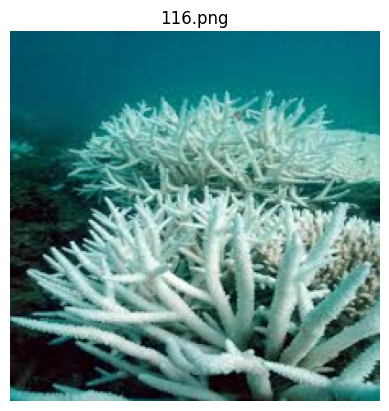

Random image from 'Unbleached' folder:


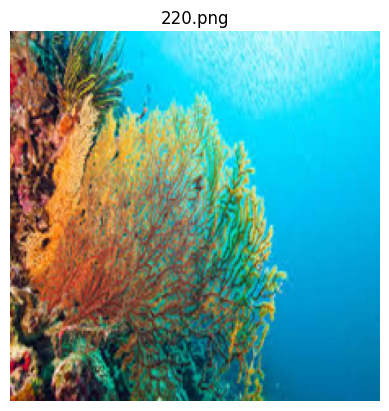

In [6]:
# Plot random images from both categories

# Define the paths to the extracted folders
bleached_folder = path_data + 'Bleached'
unbleached_folder = path_data + 'Unbleached'

# Load and display a random image from both folders
print("Random image from 'Bleached' folder:")
load_random_image(bleached_folder)

print("Random image from 'Unbleached' folder:")
load_random_image(unbleached_folder)

# Create train, test, val datasets

In [ ]:
! pip install split-folders # Put to requirements later

In [7]:
# Split data into training, validation, and test sets

import splitfolders
import shutil

bleached_folder = path_data + 'Bleached'
unbleached_folder = path_data + 'Unbleached'

# Splits data into train, val, and test folders (e.g., 80%, 10%, 10% ratio)
model_data_dir = os.path.join(path_data, "model_data_split")
splitfolders.ratio(path_data, output=model_data_dir, seed=42, ratio=(0.8, 0.1, 0.1))

# Directory cleaning:
# Remove the original folders to avoid confusion
bleached_folder = os.path.join(path_data, "Bleached")
unbleached_folder = os.path.join(path_data, "Unbleached")

if os.path.exists(bleached_folder):
    shutil.rmtree(bleached_folder)
if os.path.exists(unbleached_folder):
    shutil.rmtree(unbleached_folder)

Copying files: 342 files [00:00, 4944.58 files/s]


In [8]:
# Define paths to the new datasets
bleached_train_set = os.path.join(model_data_dir, 'train', 'Bleached')
bleached_val_set = os.path.join(model_data_dir, 'val', 'Bleached')
bleached_test_set = os.path.join(model_data_dir, 'test', 'Bleached')

unbleached_train_set = os.path.join(model_data_dir, 'train', 'Unbleached')
unbleached_val_set = os.path.join(model_data_dir, 'val', 'Unbleached')
unbleached_test_set = os.path.join(model_data_dir, 'test', 'Unbleached')

# Baseline model

In [ ]:
# Create a baseline CNN model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, optimizers, Input

image_size = (224, 224)
input_shape = image_size + (3,)
num_classes = 2
learning_rate = 0.001

def create_baseline_cnn(input_shape, num_classes=2, learning_rate=0.001):

    # Build the model
    model = Sequential()
    # Normalize pixel values to [0,1] inside the model so saved model includes preprocessing
    model.add(layers.Rescaling(1./255, input_shape=input_shape)) # CHECK AGAIN WHAT THIS DOES
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))

    if num_classes == 2:
        model.add(layers.Dense(1, activation='sigmoid'))
    else:
        model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    if num_classes == 2:
        model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    else:
        model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

baseline_model = create_baseline_cnn(input_shape, num_classes, learning_rate)
baseline_model.summary()

/Users/et/.pyenv/versions/3.10.6/envs/ReefSight-Project/lib/python3.10/site-packages/keras/src/layers/preprocessing/data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Load data using image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

batch_size = 32
seed=42

train_data_dir = os.path.join(model_data_dir, 'train')
val_data_dir = os.path.join(model_data_dir, 'val')

train_ds = image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="binary",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    val_data_dir,
    labels="inferred",
    label_mode="binary",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

print("Class names train dataset:", train_ds.class_names)
print("Class names validation dataset:", val_ds.class_names)

Found 273 files belonging to 2 classes.
Found 33 files belonging to 2 classes.
Class names train dataset: ['Bleached', 'Unbleached']
Class names validation dataset: ['Bleached', 'Unbleached']


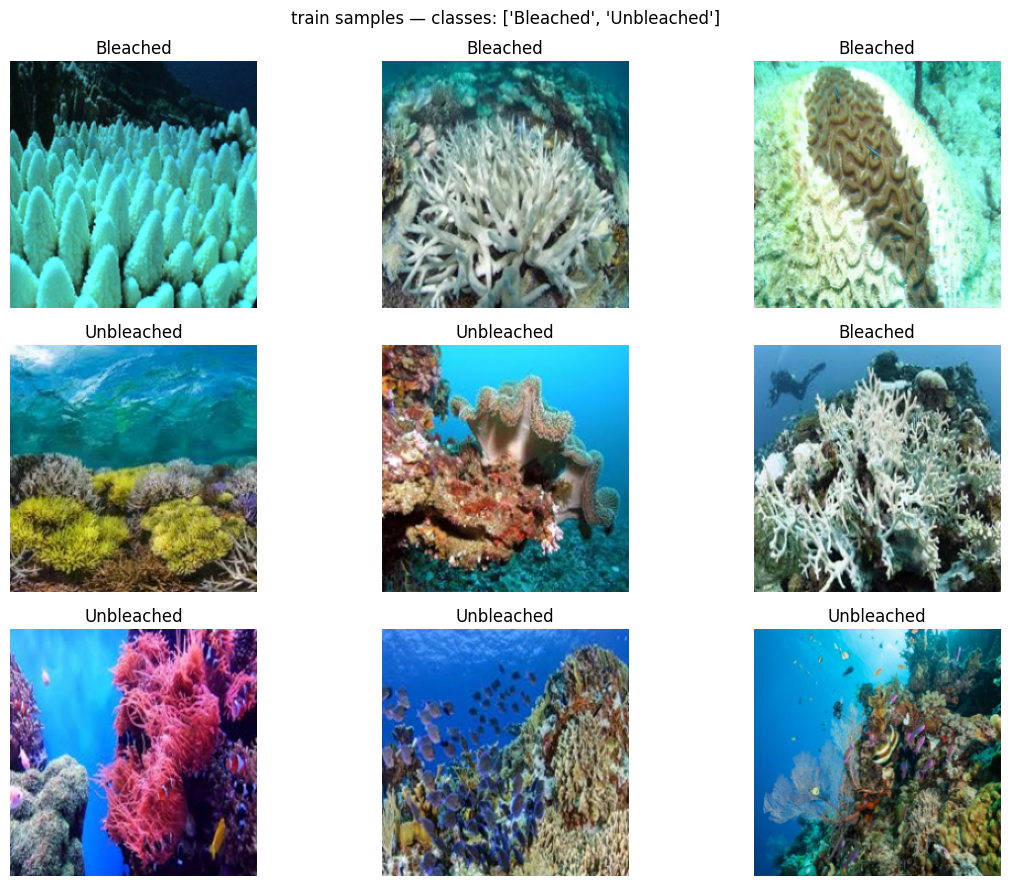

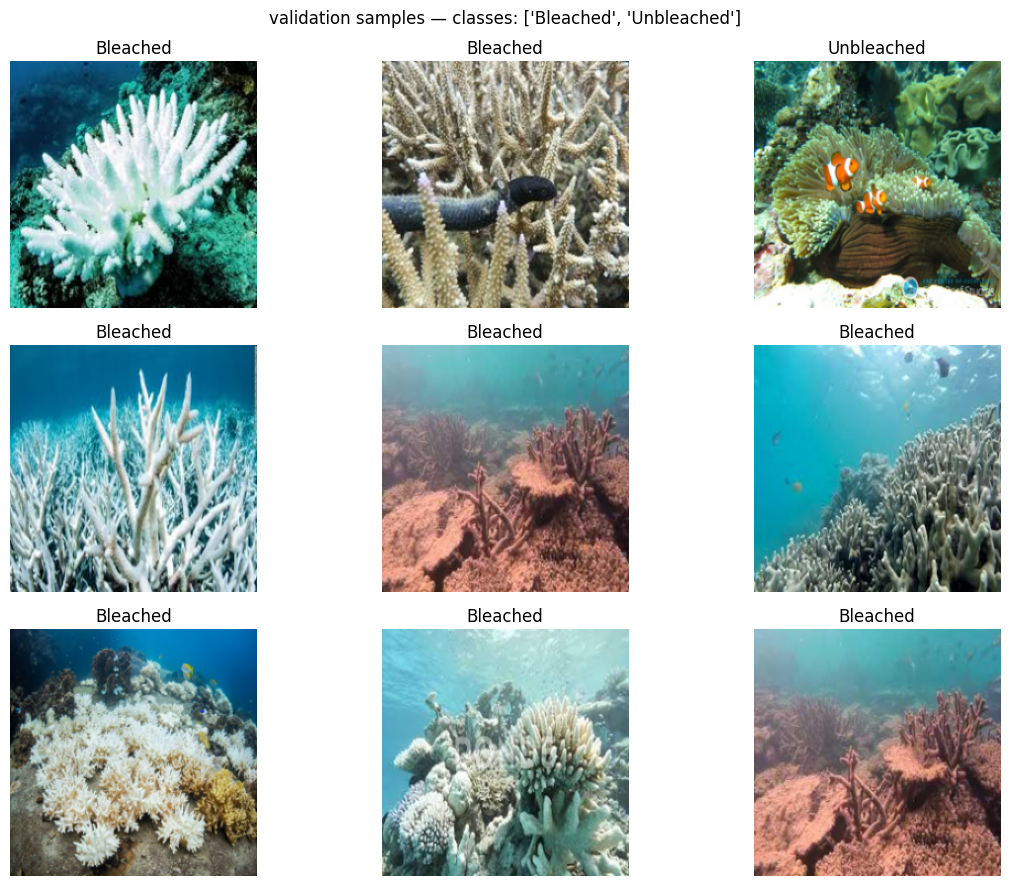

In [11]:
# Optional: visualize some samples from the datasets to check if they are labeled correctly
def plot_dataset_samples(ds, dataset_name='dataset', n=9):
    class_names = ds.class_names
    images, labels = next(iter(ds))  # take one batch
    labels = labels.numpy().astype(int).ravel()
    num = min(n, images.shape[0])
    idxs = random.sample(range(images.shape[0]), k=num)

    cols = 3
    rows = (num + cols - 1) // cols
    plt.figure(figsize=(cols * 4, rows * 3))
    for i, idx in enumerate(idxs):
        ax = plt.subplot(rows, cols, i + 1)
        img = images[idx].numpy().astype('uint8')
        plt.imshow(img)
        plt.title(class_names[labels[idx]])
        plt.axis('off')
    plt.suptitle(f"{dataset_name} samples — classes: {class_names}")
    plt.tight_layout()
    plt.show()

# Show 9 random samples from train and validation sets
plot_dataset_samples(train_ds, dataset_name='train', n=9)
plot_dataset_samples(val_ds, dataset_name='validation', n=9)

In [12]:
# Train the baseline model using tf.data `train_ds` and `val_ds`

# Configure callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                     patience=10,
                                     restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(os.path.join(model_data_dir, 'baseline_best.keras'),
                                       monitor='val_loss',
                                       save_best_only=True), # What does ModelCheckpoint do?
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.5,
                                         patience=2,
                                         verbose=1), # What does ReduceLROnPlateau do?
]

# Train using datasets
epochs = 1000

history = baseline_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks,
)

# Save final model
baseline_model.save(os.path.join(path_data, 'baseline_model.keras'))

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - accuracy: 0.6154 - loss: 2.5667 - val_accuracy: 0.4848 - val_loss: 1.0628 - learning_rate: 0.0010
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - accuracy: 0.7363 - loss: 0.5500 - val_accuracy: 0.7879 - val_loss: 0.4835 - learning_rate: 0.0010
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.8938 - loss: 0.3041 - val_accuracy: 0.7879 - val_loss: 0.4334 - learning_rate: 0.0010
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.9304 - loss: 0.2094 - val_accuracy: 0.7576 - val_loss: 0.5502 - learning_rate: 0.0010
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.9377 - loss: 0.1666 - val_accuracy: 0.8182 - val_loss: 0.4098 - learning_rate: 0.0010
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.9524 - loss: 0.1828 - val_accuracy: 0.7879 - val_loss: 0.4201 - learning_rate: 0.0010
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.9714 - loss: 0.1282
Ep

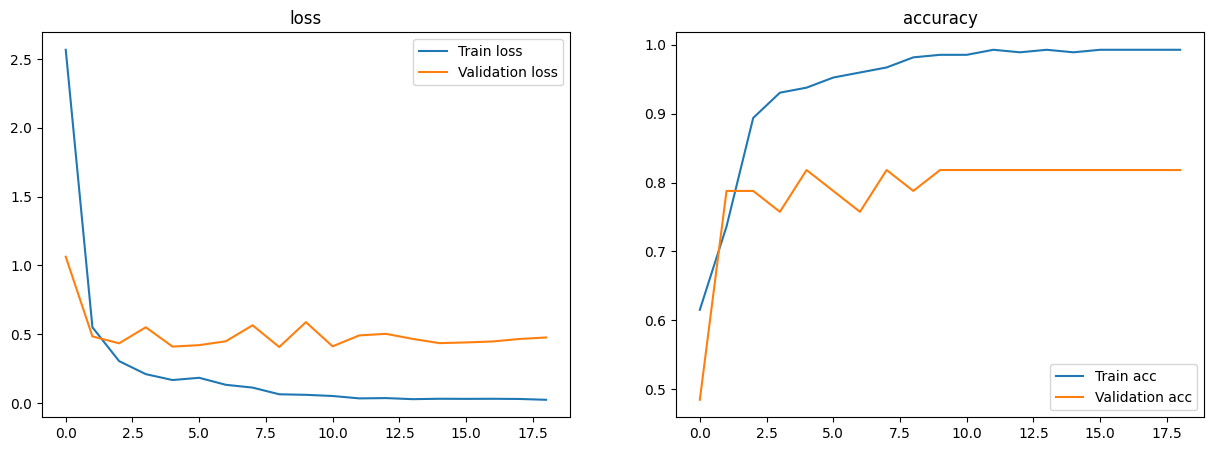

In [13]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

plot_history(history)

In [ ]:
# Todo:
# - Display best params
# - Do we need test data?
# - Function for loading data
# - Check again what resizing is doing
# - Model evaluation?
# - Which data for predictions? How can we predict on new images?
# - What does image_dataset_from_directory do?
# - Implement data augmentation?
# - What does the other callbacks do?